# Iris Flower Classification

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

The three different species of iris flowers are: Iris Setosa, Iris Versicolour, Iris Virginica

The dataset consists of four features (attributes) measured from each iris flower:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

In [1]:
# importing the required libraries for the analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
iris = pd.read_csv("D:\Projects\Dataset\Iris Dataset.csv", encoding = 'latin-1')
pd.set_option('display.max_columns', None)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delete a column
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display stats about data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Preprocessing

In [9]:
# check for missing/null values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Observation: 
There are no null values in the Iris Dataset

## Exploratory Data Analysis

# Histogram

Histograms show the distribution of a single feature.

A histogram is a graphical representation that shows the distribution of a continuous variable by dividing the data into intervals (bins) and counting the number of data points that fall into each bin.

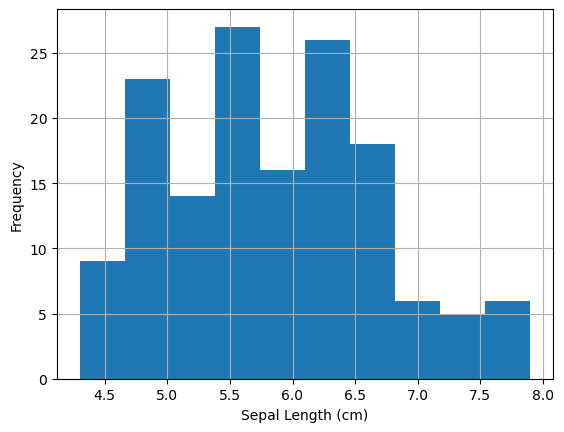

In [11]:
# Histogram
iris['SepalLengthCm'].hist()

# Add x-axis label
plt.xlabel('Sepal Length (cm)')

# Add y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()

In the above case:

The x-axis of the histogram represents the range of "SepalLengthCm" values.

The y-axis represents the frequency or count of data points falling into each bin or interval on the x-axis.

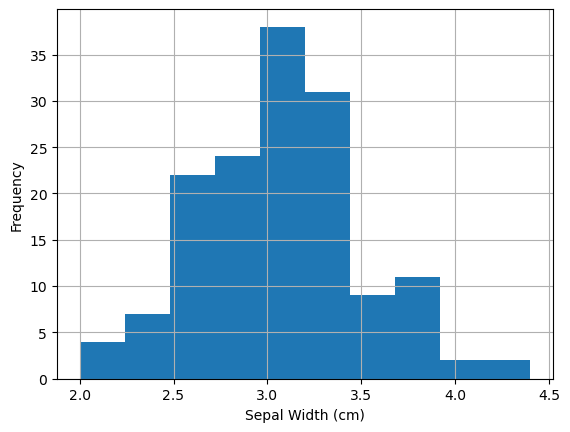

In [12]:
iris['SepalWidthCm'].hist()

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

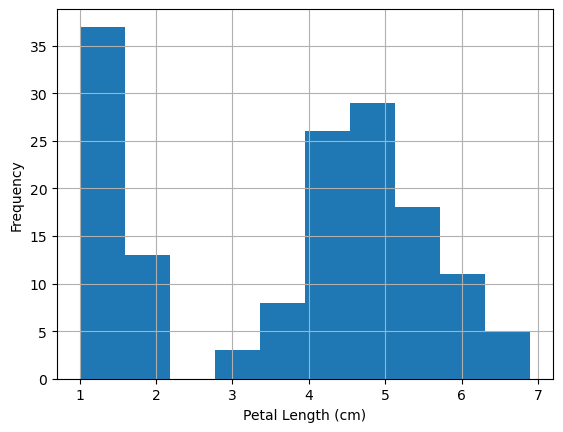

In [13]:
iris['PetalLengthCm'].hist()

plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

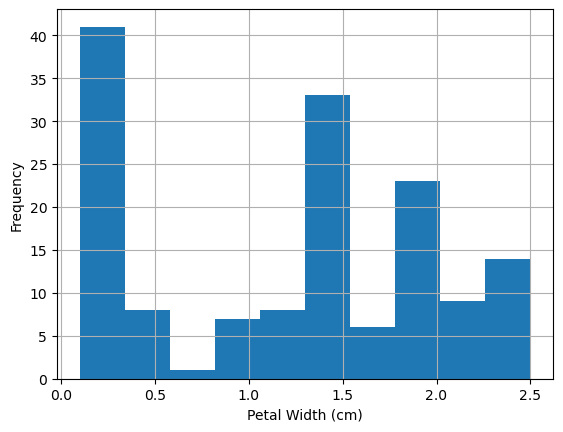

In [14]:
iris['PetalWidthCm'].hist()

plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

### Scatterplot
A scatter plot is a type of data visualization that shows the relationship between different variables

In [15]:
# scatterplot
colors = ['purple', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

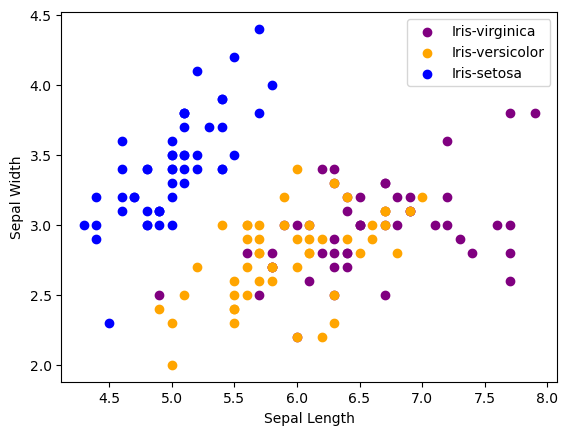

In [16]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

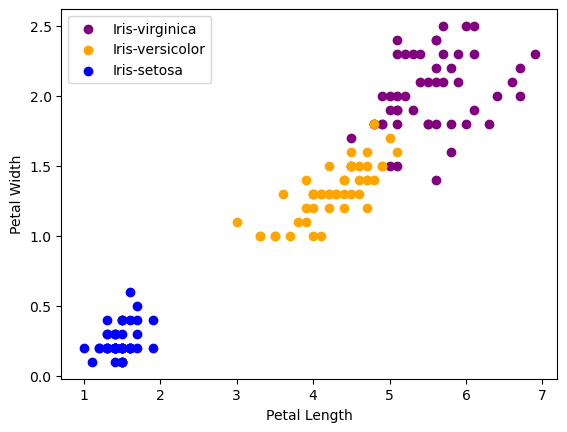

In [17]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

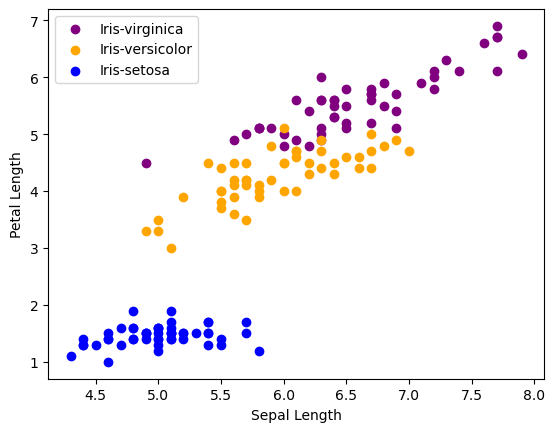

In [18]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

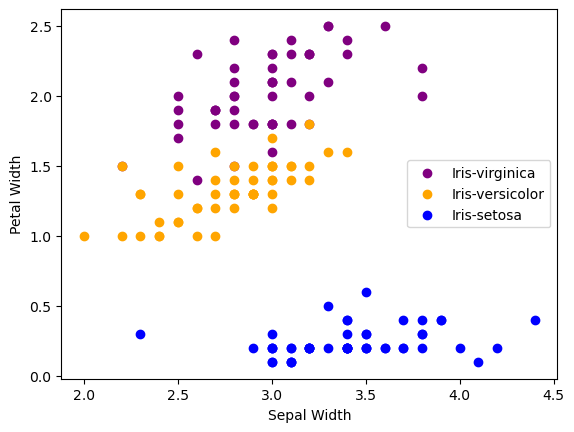

In [19]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Coorelation Matrix

The correlation matrix contains correlation coefficients between all pairs of features. Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

In [20]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Heatmap
A heatmap can show the correlation between different features.

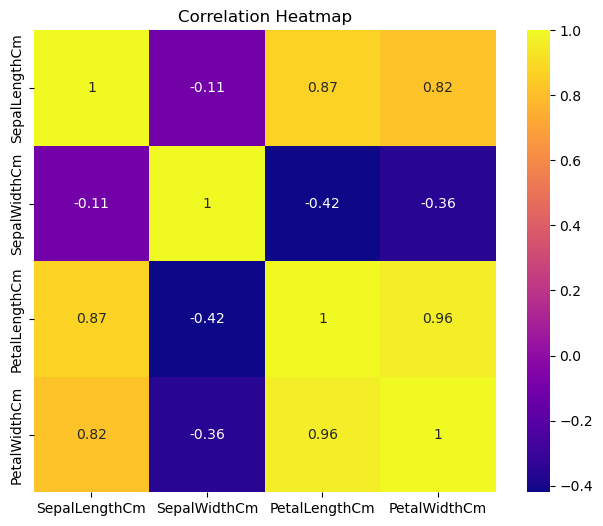

In [21]:
# Correlation Heatmap

plt.figure(figsize=(8, 6))
corr = iris.corr()
sns.heatmap(corr, annot=True, cmap='plasma', square=True)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

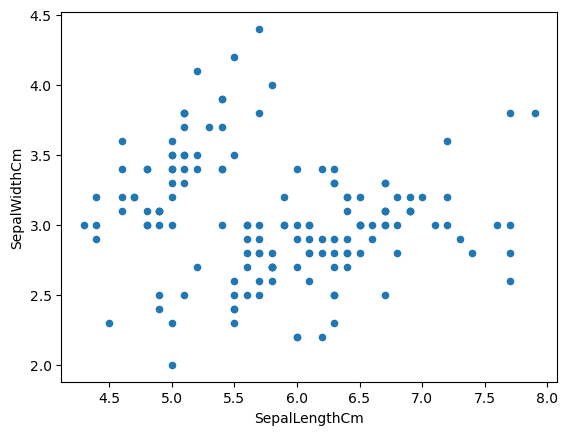

In [22]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

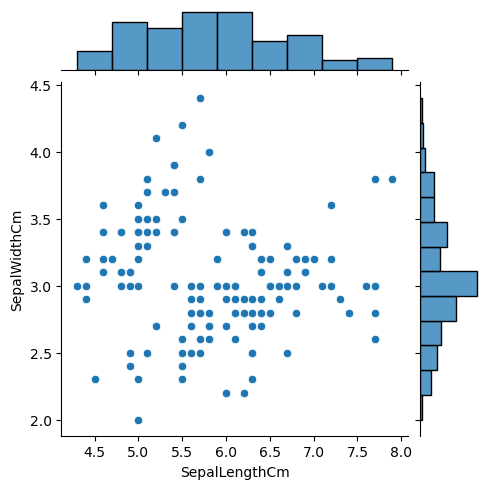

In [33]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5)

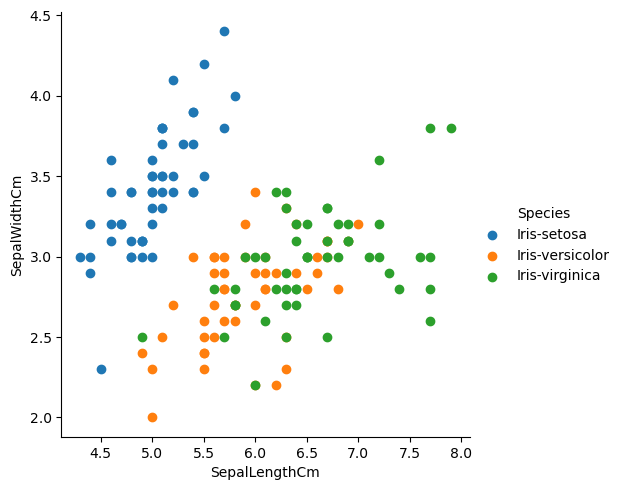

In [24]:
# We'll use seaborn's FacetGrid to color the scatterplot by species (to know  what species each plant is)
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

### Pairplot
Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
The pairplot is a great way to visualize the relationships between different pairs of features in the dataset.

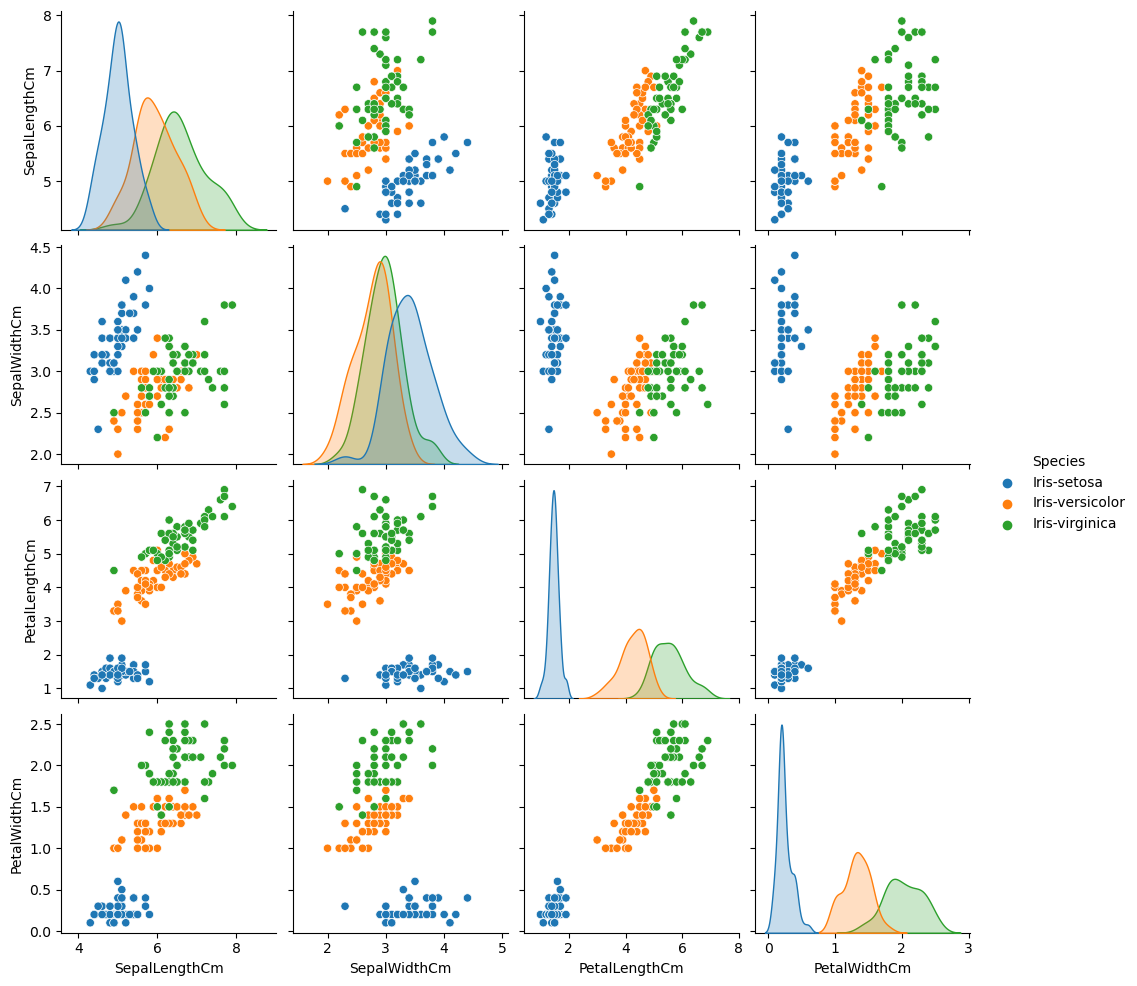

In [25]:
# Pairplot shows the bivariate relation between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations
sns.pairplot(iris, hue='Species')
plt.show()

<Figure size 640x480 with 0 Axes>

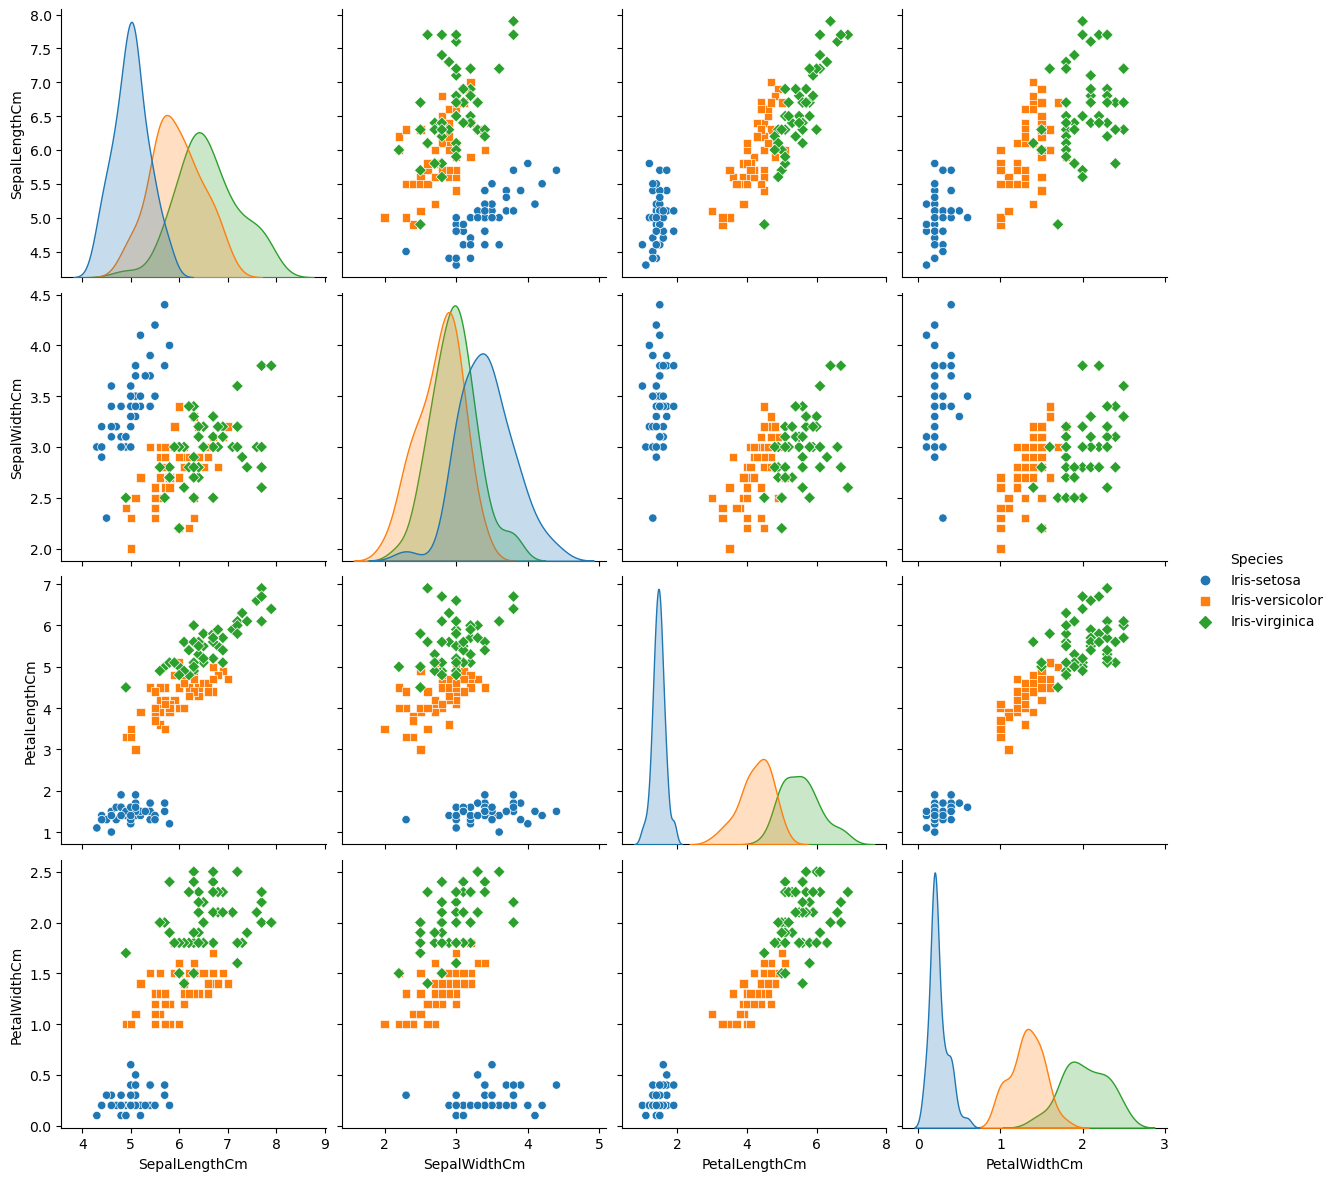

In [26]:
plt.figure()
sns.pairplot(iris, hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

### Boxplots
Boxplots help to visualize the distribution of each feature for each species.

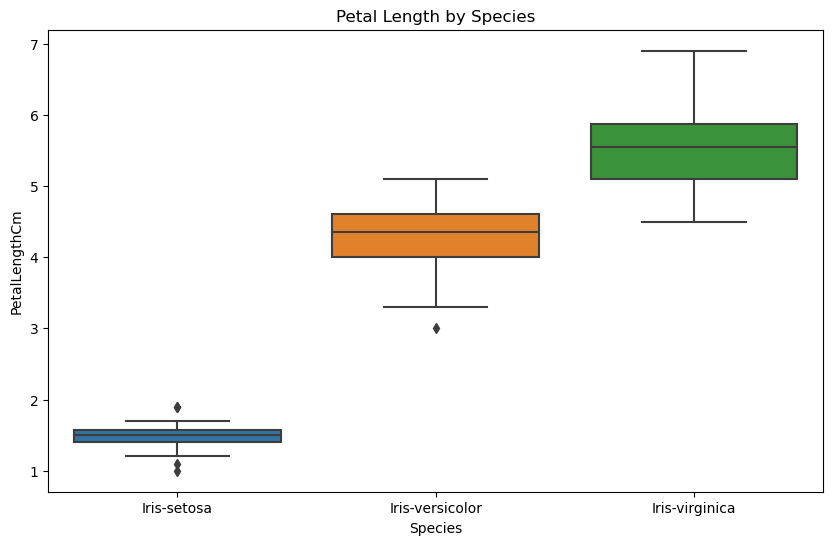

In [27]:
# We can look at an individual feature in Seaborn through a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Petal Length by Species')
plt.show()

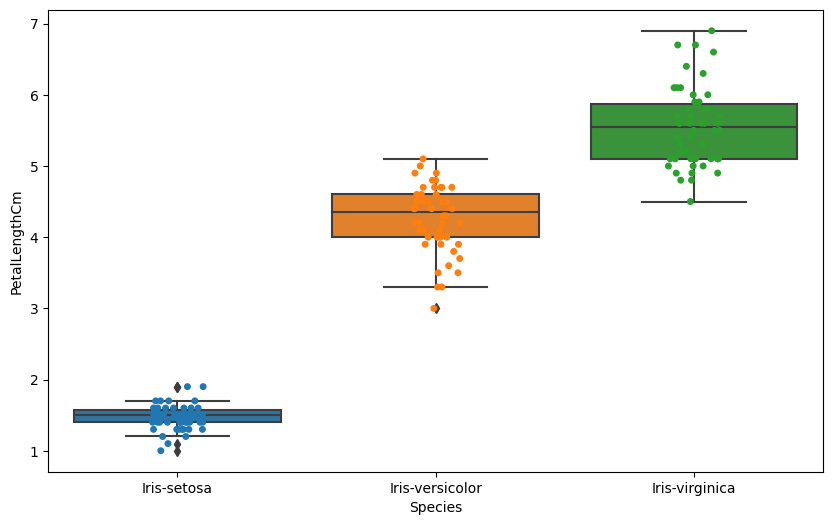

In [28]:
# To extend this plot, we can add a layer of individual points on top of it through Seaborn's striplot

# We'll use jitter=True so that all the points don't fall in single vertical lines above the species

# Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

By adding the strip plot to the box plot, we can see not only the distribution and spread of the data through the box plot but also the individual data points for each species through the strip plot. This combination provides a more comprehensive view of the data, allowing us to observe potential outliers and variations within each species.

**NOTE:** The use of ax = ... before each plot ensures that the subsequent plots are displayed on top of the previous one, avoiding overlapping plots. The final plot will show both the box plot and the strip plot together.

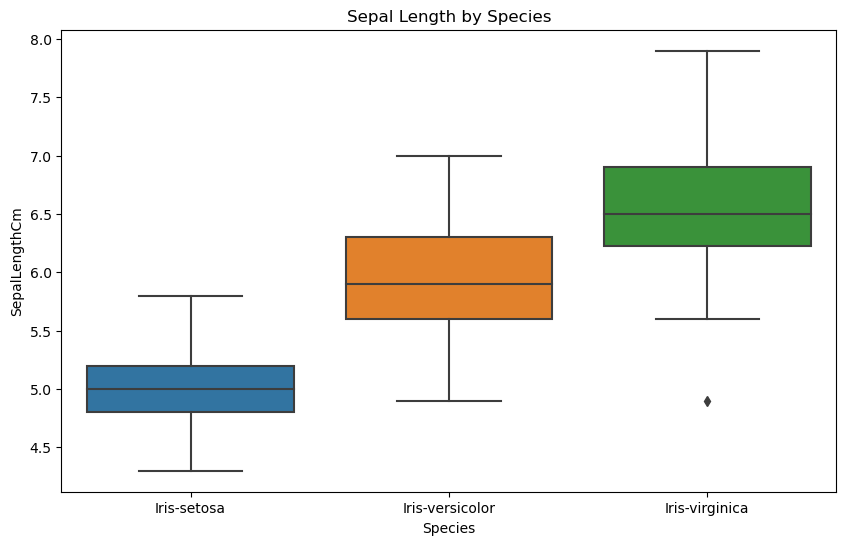

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Sepal Length by Species')
plt.show()

### Violin Plot
Violin plots are similar to boxplots but also show the kernel density estimation of the feature distribution.
Denser regions of the data are fatter, and sparser thinner in a violin plot.

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

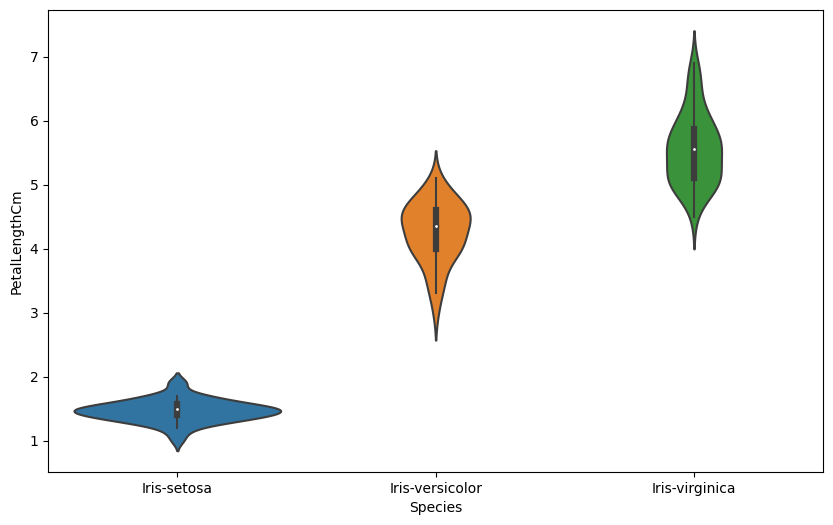

In [30]:
# A violin plot combines the benefits of the previous two plots and simplifies them

plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

### Swarm Plot
Swarm plots show individual data points along with the distribution.

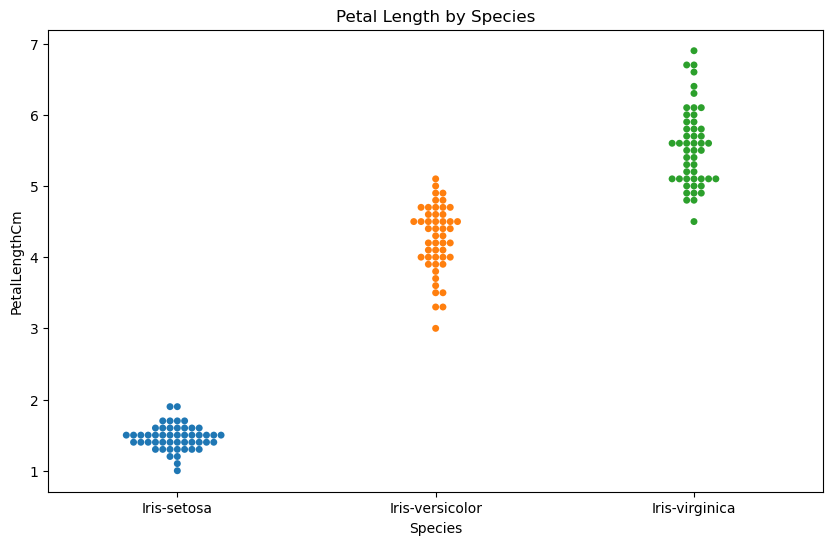

In [31]:
# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Petal Length by Species')
plt.show()

### KDE Plot
A KDE plot is a useful visualization for understanding the probability density of a continuous variable.
A KDE plot creates and visualizes a kernel density estimate of the underlying feature.

A kernel density plot is a form of a graph that uses a single continuous curve to show the distribution of values in a dataset. It is similar to a histogram, but it is better at depicting the shape of distribution.

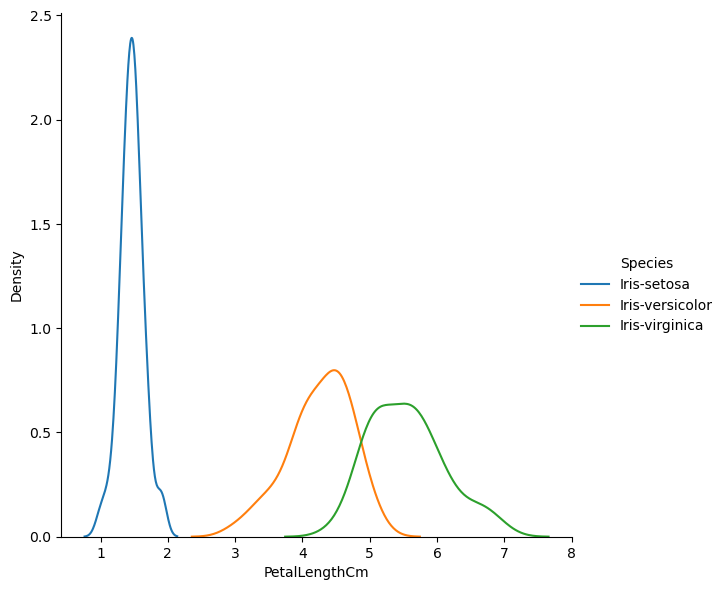

In [32]:
# The code provided uses Seaborn's FacetGrid along with kdeplot to create a kernel density estimate (KDE)
# plot for the "PetalLengthCm" feature of the Iris dataset, grouped by different species.

sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()